In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# see all columns
pd.set_option('display.max_columns', None)


# Exploratory Data Analysis (EDA) on sn_clean Dataset

This notebook documents the process of EDA on the `sn_clean` dataset. We start by loading the data, identifying potential data quality issues, and then addressing them. The subsequent sections will delve into a deeper exploration and visualization of the dataset.


## Data Loading



In [9]:
sn_clean = pd.read_csv("../data/processed/sn_clean.csv", parse_dates=["ReservationTime", "StartTime", "EndTime"])
sn_clean.head()

,BilID,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,Gender,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration,Month,Weekday,StartHour
0,WBY1Z21040V307905,32614,55.670268,12.586064,55.652954,12.544699,2017-08-16 14:40:29,2017-08-16 14:34:29,2017-08-16 14:52:55,32,M,94,91,5,103142,102851,0 days 00:18:26,8,Wednesday,14
1,WBY1Z21040V308214,44363,55.687024,12.585952,55.726655,12.553914,2017-08-16 14:42:00,2017-08-16 14:38:00,2017-08-16 15:05:22,25,M,48,42,7,102212,157231,0 days 00:27:22,8,Wednesday,14
2,WBY1Z210X0V308265,39704,55.672866,12.597133,55.669174,12.540440,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:22:39,23,M,41,9,28,103142,102821,0 days 16:00:40,8,Tuesday,19
3,WBY1Z21010V308302,43260,55.691921,12.563013,55.681266,12.518947,2017-08-02 00:53:49,2017-08-02 00:53:49,2017-08-02 15:02:31,23,M,59,53,5,102441,147233,0 days 14:08:42,8,Wednesday,0
4,WBY1Z210X0V308041,40964,55.683683,12.581574,55.695163,12.460236,2017-08-02 09:36:51,2017-08-02 09:31:51,2017-08-02 12:37:15,45,M,73,46,29,102231,175041,0 days 03:05:24,8,Wednesday,9


In [10]:
# convert TripDuration to timedelta
sn_clean["TripDuration"] = pd.to_timedelta(sn_clean["TripDuration"])
# create TripDurationMinutes column
sn_clean["TripDurationMinutes"] = sn_clean["TripDuration"].dt.total_seconds()/60
# Create a new column 'BatteryConsumed' by subtracting 'BatteryEnd' from 'BatteryStart'
sn_clean['BatteryConsumed'] = sn_clean['BatteryStart'] - sn_clean['BatteryEnd']
# create new binary column called LongTrip if col KmDriven > 60
sn_clean["LongTrip"] = np.where(sn_clean["KmDriven"] > 60, 1, 0)


c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

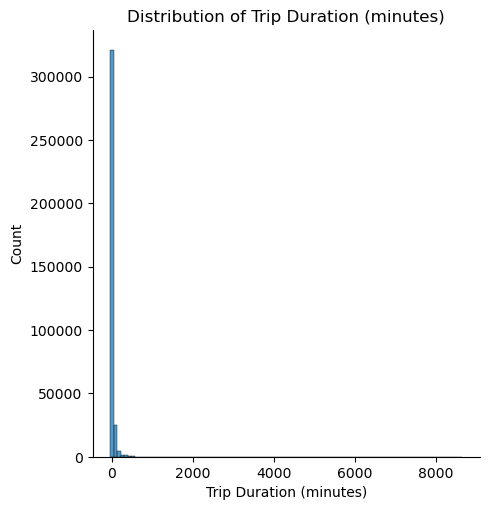

In [11]:
# plot distribution of TripDurationMinutes
plt.figure(figsize=(10, 6))
sns.displot(sn_clean["TripDurationMinutes"], kde=False, bins=100)
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Count")
plt.show()

In [12]:
sn_clean.head()

,BilID,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,Gender,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration,Month,Weekday,StartHour,TripDurationMinutes,BatteryConsumed,LongTrip
0,WBY1Z21040V307905,32614,55.670268,12.586064,55.652954,12.544699,2017-08-16 14:40:29,2017-08-16 14:34:29,2017-08-16 14:52:55,32,M,94,91,5,103142,102851,0 days 00:18:26,8,Wednesday,14,18.433333,3,0
1,WBY1Z21040V308214,44363,55.687024,12.585952,55.726655,12.553914,2017-08-16 14:42:00,2017-08-16 14:38:00,2017-08-16 15:05:22,25,M,48,42,7,102212,157231,0 days 00:27:22,8,Wednesday,14,27.366667,6,0
2,WBY1Z210X0V308265,39704,55.672866,12.597133,55.669174,12.540440,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:22:39,23,M,41,9,28,103142,102821,0 days 16:00:40,8,Tuesday,19,960.666667,32,0
3,WBY1Z21010V308302,43260,55.691921,12.563013,55.681266,12.518947,2017-08-02 00:53:49,2017-08-02 00:53:49,2017-08-02 15:02:31,23,M,59,53,5,102441,147233,0 days 14:08:42,8,Wednesday,0,848.700000,6,0
4,WBY1Z210X0V308041,40964,55.683683,12.581574,55.695163,12.460236,2017-08-02 09:36:51,2017-08-02 09:31:51,2017-08-02 12:37:15,45,M,73,46,29,102231,175041,0 days 03:05:24,8,Wednesday,9,185.400000,27,0


In [13]:
sn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355337 entries, 0 to 355336
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   BilID                355337 non-null  object         
 1   PersonID             355337 non-null  int64          
 2   LatitudeStart        355337 non-null  float64        
 3   LongitudeStart       355337 non-null  float64        
 4   LatitudeEnd          355337 non-null  float64        
 5   LongitudeEnd         355337 non-null  float64        
 6   ReservationTime      355337 non-null  datetime64[ns] 
 7   StartTime            355337 non-null  datetime64[ns] 
 8   EndTime              355337 non-null  datetime64[ns] 
 9   Age                  355337 non-null  int64          
 10  Gender               355337 non-null  object         
 11  BatteryStart         355337 non-null  int64          
 12  BatteryEnd           355337 non-null  int64          
 13 

In [14]:
# convert month from int to string like January, February, etc.
sn_clean["Month"] = sn_clean["ReservationTime"].dt.strftime("%B")
# convert Month, Week, Gender to categorical
sn_clean["Month"] = sn_clean["Month"].astype("category")
sn_clean["Weekday"] = sn_clean["Weekday"].astype("category")
sn_clean["Gender"] = sn_clean["Gender"].astype("category")

## Addressing Data Quality Issues

### Erroneous End Coordinates



In [15]:
# erroneous data end latitude = 0
sn_clean = sn_clean[sn_clean["LatitudeEnd"] != 0]
# fliter 0 < km driven< 600  
sn_clean = sn_clean[(sn_clean["KmDriven"] > 0) & (sn_clean["KmDriven"] < 400)]

# set BatteryEnd = 0 if BatteryEnd = -1
sn_clean.loc[sn_clean["BatteryEnd"] == -1, "BatteryEnd"] = 0
# remove from and to zone id = 0
sn_clean = sn_clean[(sn_clean["FromZoneID"] != 0) & (sn_clean["ToZoneID"] != 0)]
# remove BatteryConsumed <0
sn_clean = sn_clean[sn_clean["BatteryConsumed"] >= 0]

# remove negative TripDurationMinutes
sn_clean = sn_clean[sn_clean["TripDurationMinutes"] >= 0]



In [16]:
# describe the data
sn_clean.describe()


,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration,StartHour,TripDurationMinutes,BatteryConsumed,LongTrip
count,354566.000000,354566.000000,354566.000000,354566.000000,354566.000000,354566,354566,354566,354566.000000,354566.000000,354566.000000,354566.000000,354566.000000,354566.000000,354566,354566.000000,354566.000000,354566.000000,354566.000000
mean,33077.918373,55.681540,12.557225,55.681626,12.556929,2017-12-28 04:14:42.315284224,2017-12-28 04:05:47.776721152,2017-12-28 04:40:36.759528448,33.116605,60.291336,50.717818,8.306561,114955.604299,115085.168482,0 days 00:34:48.982807150,14.126428,34.816380,9.573529,0.004893
min,2.000000,55.533044,11.708186,55.232874,11.708186,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:11:25,18.000000,4.000000,0.000000,1.000000,102111.000000,102111.000000,0 days 00:01:16,0.000000,1.266667,0.000000,0.000000
25%,22673.000000,55.663981,12.531776,55.663847,12.531453,2017-10-20 15:17:53.500000,2017-10-20 15:12:05.500000,2017-10-20 15:44:43.500000,26.000000,42.000000,32.000000,4.000000,102421.000000,102422.000000,0 days 00:17:39,10.000000,17.650000,5.000000,0.000000
50%,36125.000000,55.679186,12.559428,55.679200,12.559160,2017-12-31 09:30:32.500000,2017-12-31 09:23:10.500000,2017-12-31 09:44:30,31.000000,59.000000,50.000000,6.000000,102771.000000,102771.000000,0 days 00:24:40,15.000000,24.666667,7.000000,0.000000
75%,45602.000000,55.699072,12.585323,55.699107,12.585212,2018-03-08 19:32:45.500000,2018-03-08 19:22:49.750000128,2018-03-08 19:56:51.750000128,39.000000,79.000000,69.000000,10.000000,103252.000000,103252.000000,0 days 00:34:19,18.000000,34.316667,11.000000,0.000000
max,59197.000000,56.082156,12.679269,56.082156,12.679269,2018-05-08 23:48:11,2018-05-08 23:47:11,2018-05-08 23:56:41,89.000000,100.000000,100.000000,284.000000,316143.000000,370146.000000,3 days 01:08:01,23.000000,4388.016667,100.000000,1.000000
std,15311.317433,0.030416,0.046548,0.030741,0.046812,NaN,NaN,NaN,9.585360,23.005679,23.897824,9.106157,24486.009931,24600.008925,0 days 00:59:09.037453961,5.344519,59.150624,8.894929,0.069781


In [17]:


# see PersonID unique values count
nr_users = sn_clean["PersonID"].nunique()

# see users distribution by gender
gender_users = sn_clean.groupby("Gender")["PersonID"].nunique()




In [18]:
# see gender of top 10 PersonID with most trips
top_10_persons = sn_clean["PersonID"].value_counts().head(10)
top_10_persons_gender = sn_clean[sn_clean["PersonID"].isin(top_10_persons.index)]["Gender"]
print(top_10_persons_gender.value_counts())


Gender
M    5461
F       0
Name: count, dtype: int64


In [19]:
top_10_persons.sum()

5461

## Distribution of Categorical Variables

### Gender Distribution

The dataset contains information on the gender of users. Here's a visualization of the distribution of the `Gender` variable.

```python
plt.figure(figsize=(8, 6))
sns.countplot(data=sn_clean, x='Gender')
plt.title('Distribution of Gender')
plt.ylabel('Number of Trips')
plt.show()
```

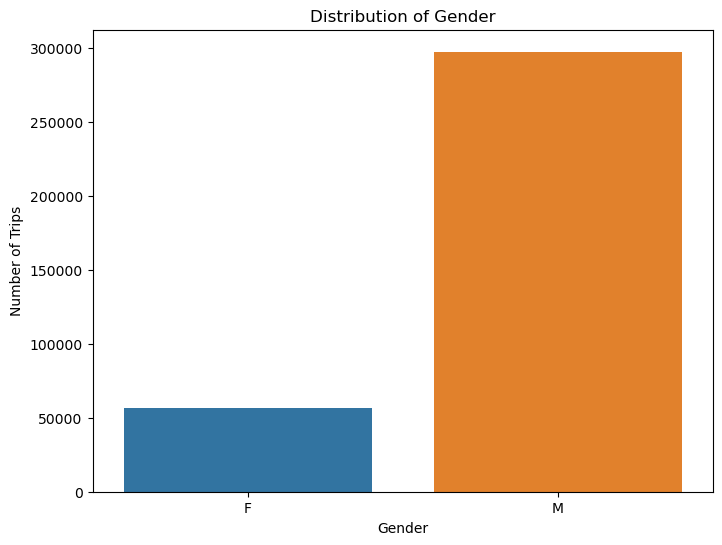

In [20]:

plt.figure(figsize=(8, 6))
sns.countplot(data=sn_clean, x='Gender')
plt.title('Distribution of Gender')
plt.ylabel('Number of Trips')
plt.show()

## Univariate Analysis

### BatteryEnd Distribution

The `BatteryEnd` column represents the battery level at the end of trips. Here's a summary of its distribution:

```python
battery_end_description = sn_clean['BatteryEnd'].describe()
battery_end_description
```

- The average battery level at the end of trips is approximately 50.73%.
- The minimum battery level observed at the end of trips is 0%, indicating some trips depleted the entire battery.
- The maximum battery level at the end of trips is 100%.
- 25% of the trips end with a battery level of 32% or below.
- 50% (or the median) of the trips end with a battery level of 50%.
- 75% of the trips end with a battery level of 69% or below.



## Bivariate Analysis

### Relationship between KmDriven and BatteryConsumed

We computed the battery consumed during each trip (`BatteryStart - BatteryEnd`) and explored its relationship with the distance driven (`KmDriven`).

```python
sn_clean['BatteryConsumed'] = sn_clean['BatteryStart'] - sn_clean['BatteryEnd']
correlation_km_driven_battery = sn_clean[['KmDriven', 'BatteryConsumed']].corr()
correlation_km_driven_battery
```

There's a positive correlation of approximately 0.204 between kilometers driven and battery consumed. The scatter plot below visualizes this relationship:

```python
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()
```

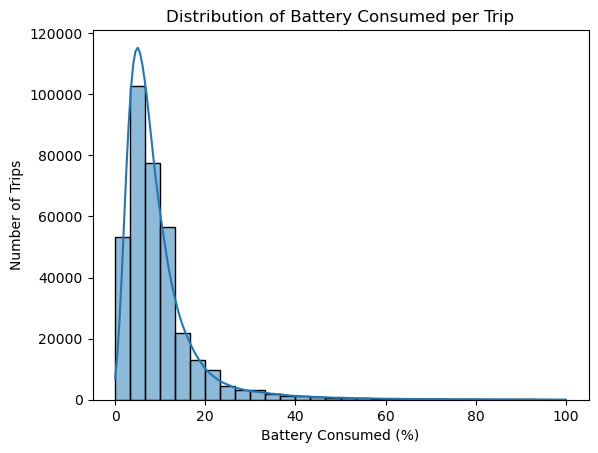

In [21]:

sns.histplot(data=sn_clean, x='BatteryConsumed', bins=30, kde=True)
plt.title('Distribution of Battery Consumed per Trip')
plt.xlabel('Battery Consumed (%)')
plt.ylabel('Number of Trips')
plt.show()

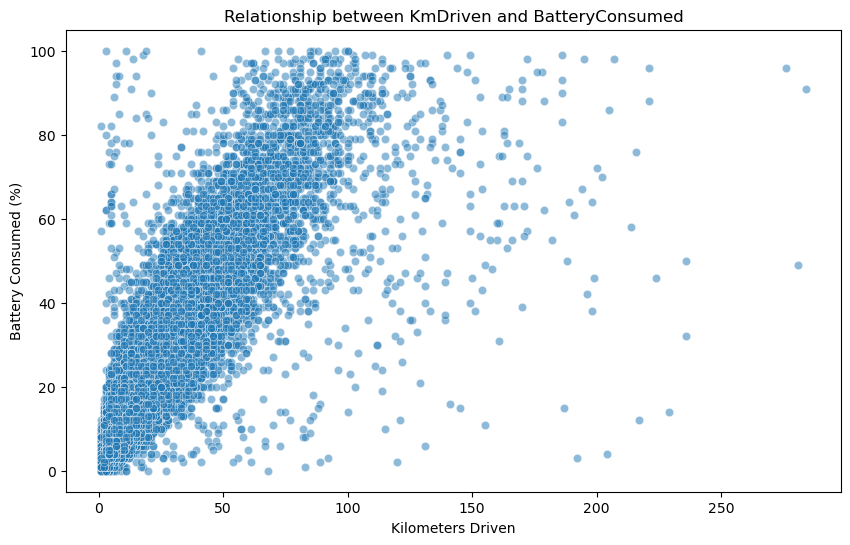

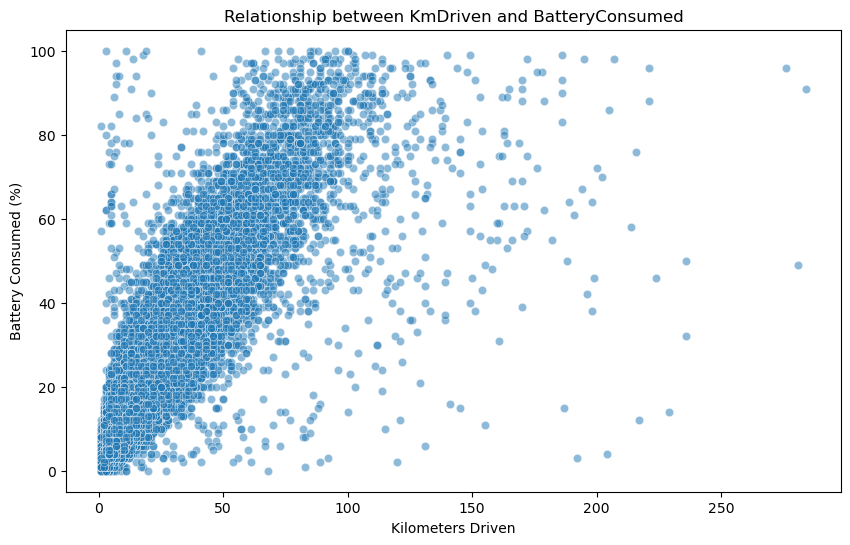

In [22]:

correlation_km_driven_battery = sn_clean[['KmDriven', 'BatteryConsumed']].corr()
correlation_km_driven_battery

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()


correlation_km_driven_battery

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()

In [23]:
'''
plt.figure(figsize=(10, 6))
sns.jointplot(data=sn_clean, x='KmDriven', y='TripDurationMinutes', kind='hex', cmap='Blues', gridsize=20)
plt.suptitle('Hexbin Plot of KmDriven vs. TripDuration', y=1.02)
plt.show()'''

"\nplt.figure(figsize=(10, 6))\nsns.jointplot(data=sn_clean, x='KmDriven', y='TripDurationMinutes', kind='hex', cmap='Blues', gridsize=20)\nplt.suptitle('Hexbin Plot of KmDriven vs. TripDuration', y=1.02)\nplt.show()"

## Univariate Analysis

We explored the distributions of various columns in the dataset using histograms, boxplots, and count plots. This section provides a summary of the observed distributions and insights drawn from them.

### Battery Consumed per Trip

The dataset contains information on the battery consumed during each trip. Here's a visualization of its distribution.

```python
sns.histplot(data=sn_clean, x='BatteryConsumed', bins=30, kde=True)
plt.title('Distribution of Battery Consumed per Trip')
plt.xlabel('Battery Consumed (%)')
plt.ylabel('Number of Trips')
plt.show()
```

### Km Driven per Trip

We visualized the distribution of kilometers driven per trip using a boxplot to identify potential outliers and understand the general spread of the data.

```python
sns.boxplot(data=sn_clean, x='KmDriven')
plt.title('Boxplot of Km Driven per Trip')
plt.xlabel('Km Driven')
plt.show()
```

In [24]:

# Calculate Q1, Q3 and IQR for KmDriven
Q1 = sn_clean['KmDriven'].quantile(0.25)
Q3 = sn_clean['KmDriven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outlier rows
outliers = sn_clean[(sn_clean['KmDriven'] < lower_bound) | (sn_clean['KmDriven'] > upper_bound)]

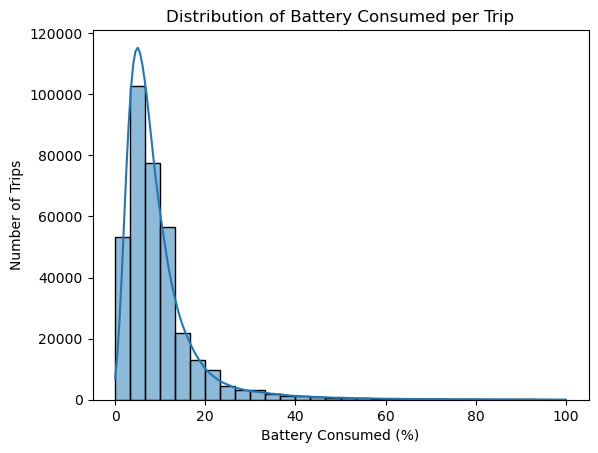

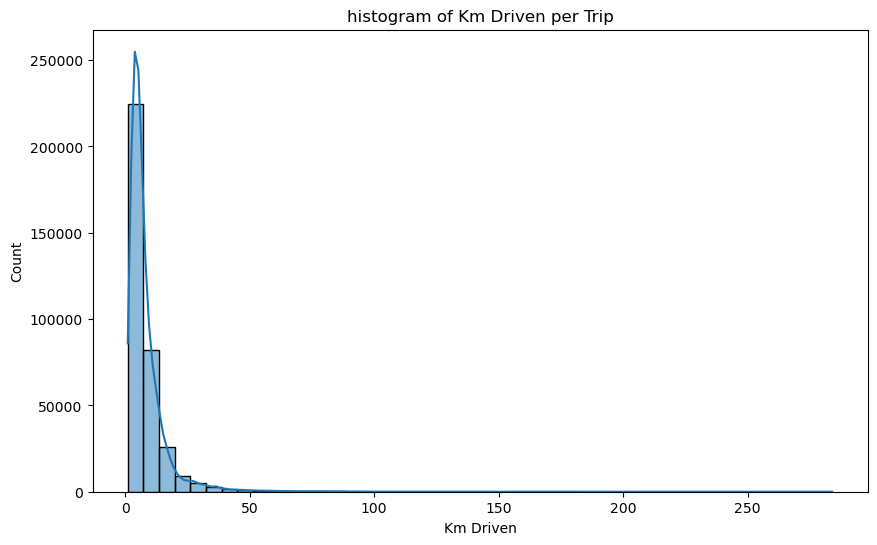

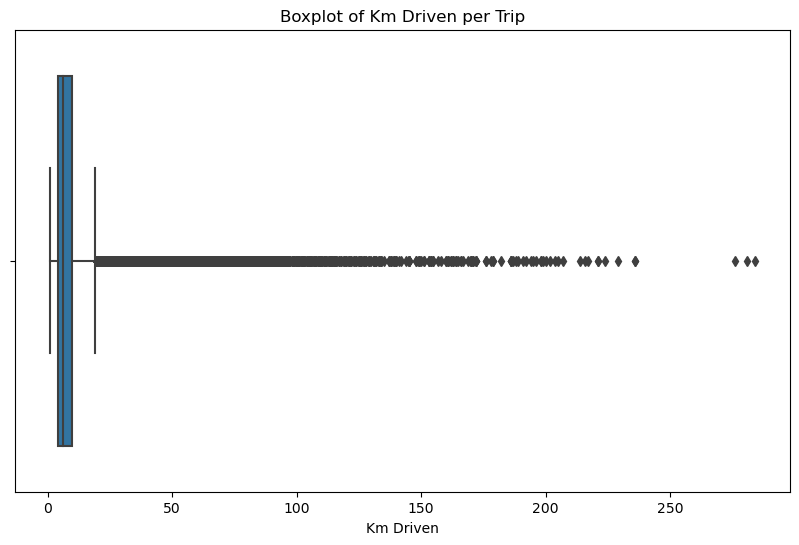

In [25]:
sns.histplot(data=sn_clean, x='BatteryConsumed', bins=30, kde=True)
plt.title('Distribution of Battery Consumed per Trip')
plt.xlabel('Battery Consumed (%)')
plt.ylabel('Number of Trips')
plt.show()

# plot histogram of KmDriven
plt.figure(figsize=(10, 6))
sns.histplot(data=sn_clean, x='KmDriven', bins=45, kde=True)
plt.title('histogram of Km Driven per Trip')
plt.xlabel('Km Driven')
plt.show()

# plot boxplot of KmDriven
plt.figure(figsize=(10, 6))
sns.boxplot(data=sn_clean, x='KmDriven')
plt.title('Boxplot of Km Driven per Trip')
plt.xlabel('Km Driven')
plt.show()



## Bivariate and Multivariate Analysis

### KmDriven vs. TripDuration

To understand the relationship between the distance driven (`KmDriven`) and the duration of the trip (`TripDuration`), we used a hexbin plot. This type of plot visualizes the density of points, making it efficient for large datasets.

```python
plt.figure(figsize=(10, 6))
sns.jointplot(data=sn_clean, x='KmDriven', y='TripDuration', kind='hex', cmap='Blues', gridsize=20)
plt.suptitle('Hexbin Plot of KmDriven vs. TripDuration', y=1.02)
plt.show()
```

The darker hexagons in the plot represent areas with a higher concentration of trips. From the plot, it's evident that most trips are short in duration and cover small distances.

### Correlation Matrix for Numerical Variables

A heatmap of the correlation matrix provides insights into the relationships between numerical variables.

```python
correlation_matrix = sn_clean[['KmDriven', 'TripDuration', 'BatteryStart', 'BatteryEnd', 'Age']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()
```

There's a noticeable positive correlation between `KmDriven` and `TripDuration`, as expected. Other variables like `BatteryStart` and `BatteryEnd` also show some degree of correlation.




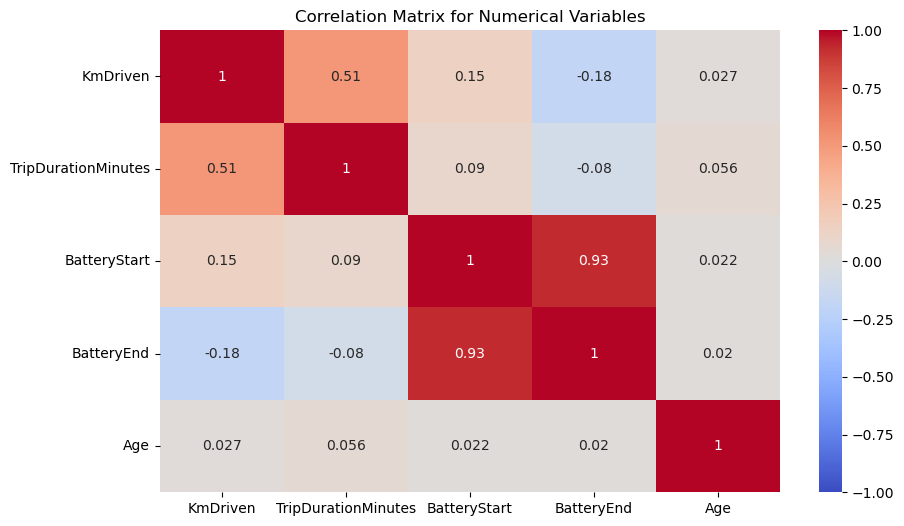

In [26]:
correlation_matrix = sn_clean[['KmDriven', 'TripDurationMinutes', 'BatteryStart', 'BatteryEnd', 'Age']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()




## Handling Outliers

### Outliers in KmDriven

Using a boxplot, we identified potential outliers in the `KmDriven` column. To quantify these outliers, the Interquartile Range (IQR) method was employed.

```python
# Calculate Q1, Q3 and IQR for KmDriven
Q1 = sn_clean['KmDriven'].quantile(0.25)
Q3 = sn_clean['KmDriven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outlier rows
outliers = sn_clean[(sn_clean['KmDriven'] < lower_bound) | (sn_clean['KmDriven'] > upper_bound)]
```

From this analysis, 21,789 trips were identified as outliers. The distribution of these outliers ranged from 20 kilometers to a maximum of 16,328 kilometers, with a median of 28 kilometers.




In [27]:
outliers['KmDriven'].describe()



count    21710.000000
mean        34.485997
std         19.378709
min         20.000000
25%         23.000000
50%         28.000000
75%         37.000000
max        284.000000
Name: KmDriven, dtype: float64


## Analysis of Trips Between 100km and 250km

### 1. Spatial Analysis

A spatial visualization of the start and end points of these trips was conducted. Both start and end points were scattered throughout Copenhagen with a few trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the early hours (1-3 AM).
- The number of such trips was relatively consistent across weekdays with a slight increase on weekends.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- The majority of trips started with the battery level between 40% and 80%.
- Many trips consumed most of the battery's charge, ending with levels close to 0%.



## Analysis of Trips Between 50km and 100km

### 1. Spatial Analysis

A spatial visualization was conducted for the start and end points of these trips. Points were spread throughout Copenhagen, with some trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the early hours (1-3 AM).
- The number of such trips was slightly higher on Fridays and Saturdays.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- Most trips started with the battery level around 40-50%.
- A significant portion of these trips consumed most of the battery, ending with levels close to 0%.



## Analysis of Trips Between 50km and 100km

### 1. Spatial Analysis

A spatial visualization of the start and end points of these trips was conducted. Both start and end points were distributed throughout Copenhagen with some trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the daytime hours, particularly around midday and early evening.
- The number of such trips was slightly higher on Fridays and Saturdays.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- The majority of trips started with the battery level between 40% and 80%, with a clear peak around 70%.
- Many trips consumed most of the battery's charge, ending with levels close to 0%.




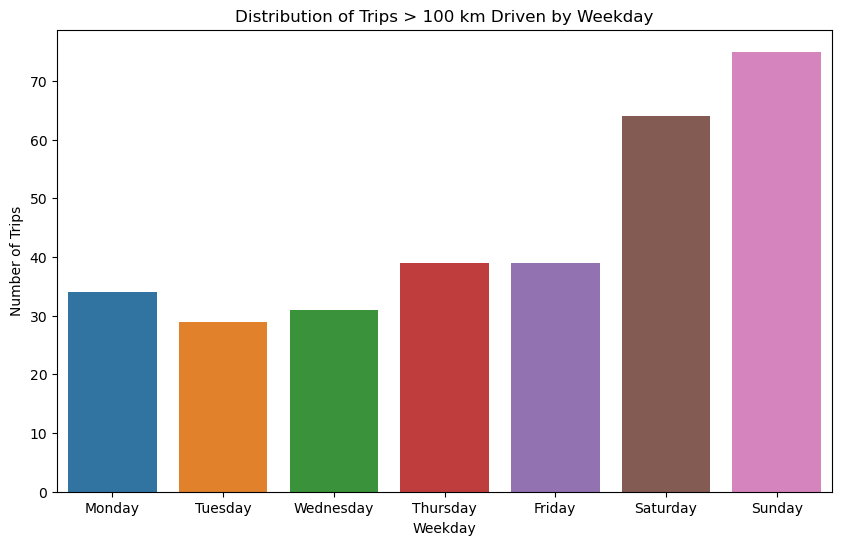

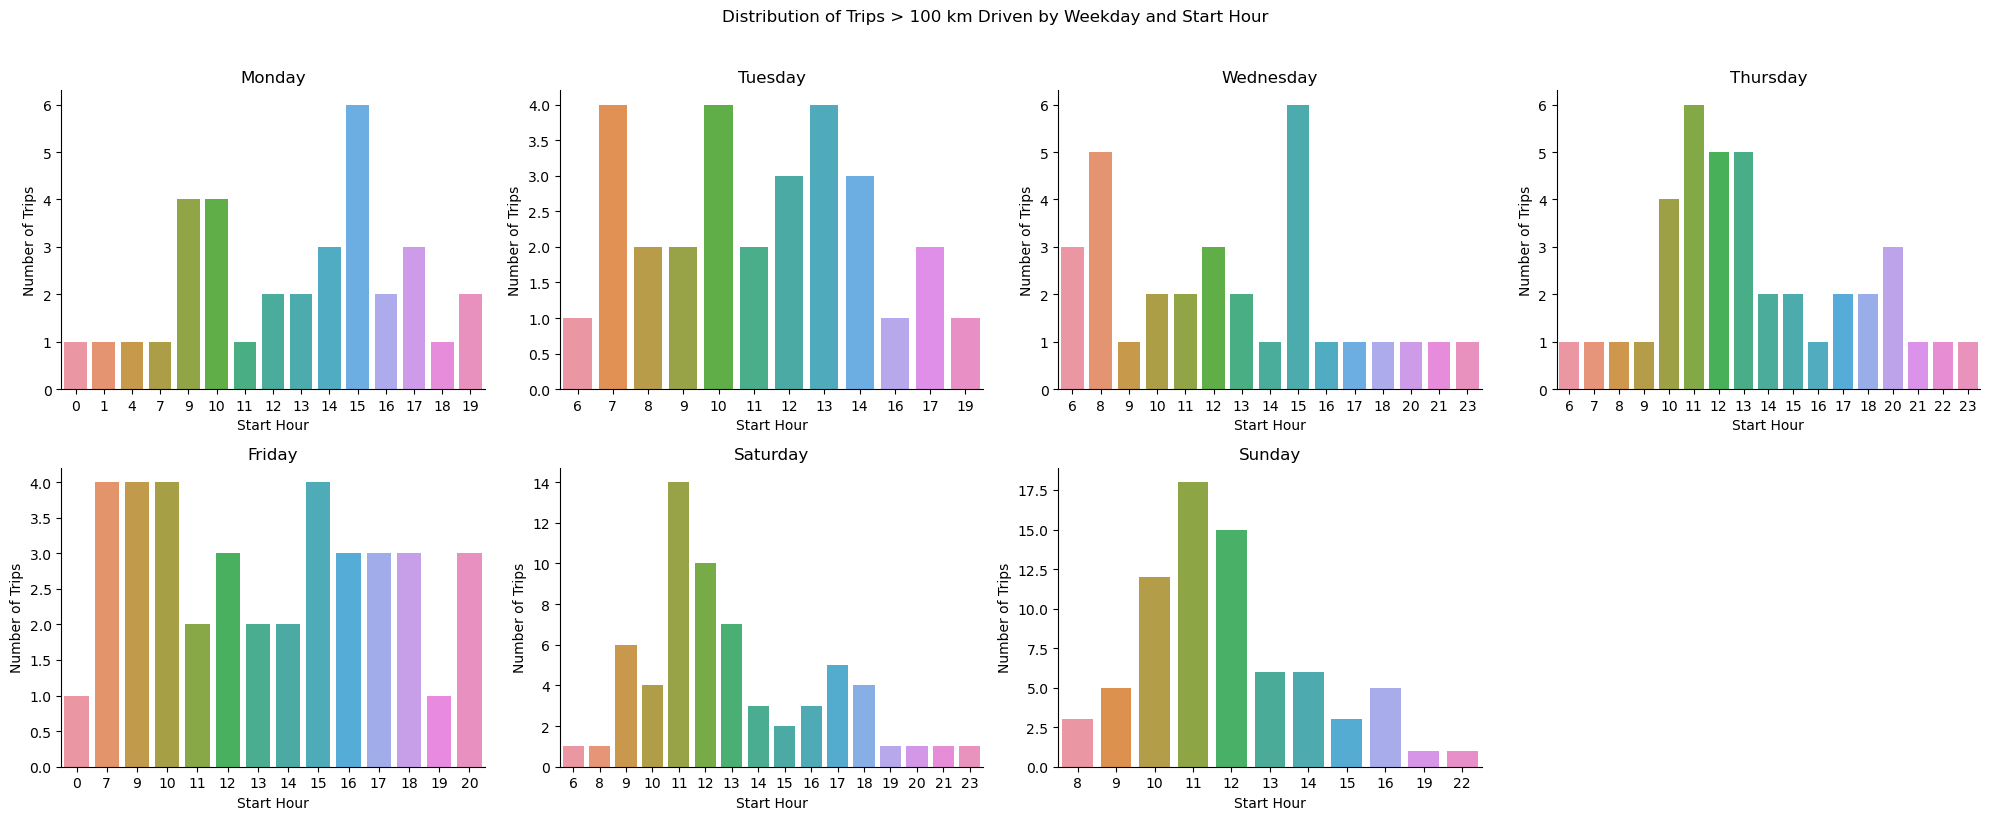

In [28]:
# plot distribution of trips > 100 km driven by weekday
# in another plot, plot distribution of trips > 100 km driven by weekday and StartHour

# filter trips > 100 km driven
trips_gt_100_km = sn_clean[sn_clean['KmDriven'] > 100]

# plot distribution of trips > 100 km driven by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=trips_gt_100_km, x='Weekday', order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Trips > 100 km Driven by Weekday')
plt.ylabel('Number of Trips')
plt.show()

# plot distribution of trips > 100 km driven by weekday and StartHour
# create a plot of 7 subplots for each weekday by StartHour
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.ravel()

for i, day in enumerate(weekdays):
    axs[i].set_title(day)
    sns.countplot(x='StartHour', data=trips_gt_100_km[trips_gt_100_km['Weekday'] == day], ax=axs[i])
    axs[i].set_xlabel('Start Hour')
    axs[i].set_ylabel('Number of Trips')

# remove the last 1 subplot
fig.delaxes(axs[-1])

# set suptitle
fig.suptitle('Distribution of Trips > 100 km Driven by Weekday and Start Hour', y=1.02)
plt.tight_layout()
sns.despine()
plt.show()

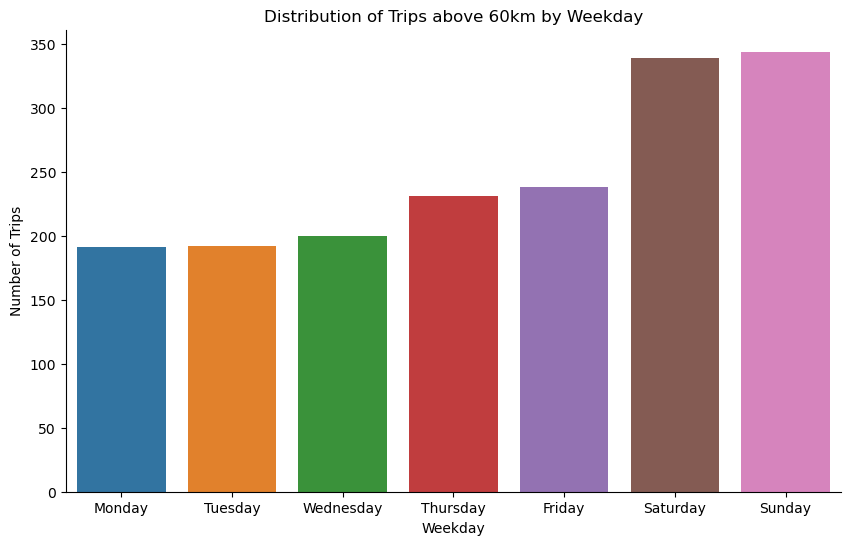

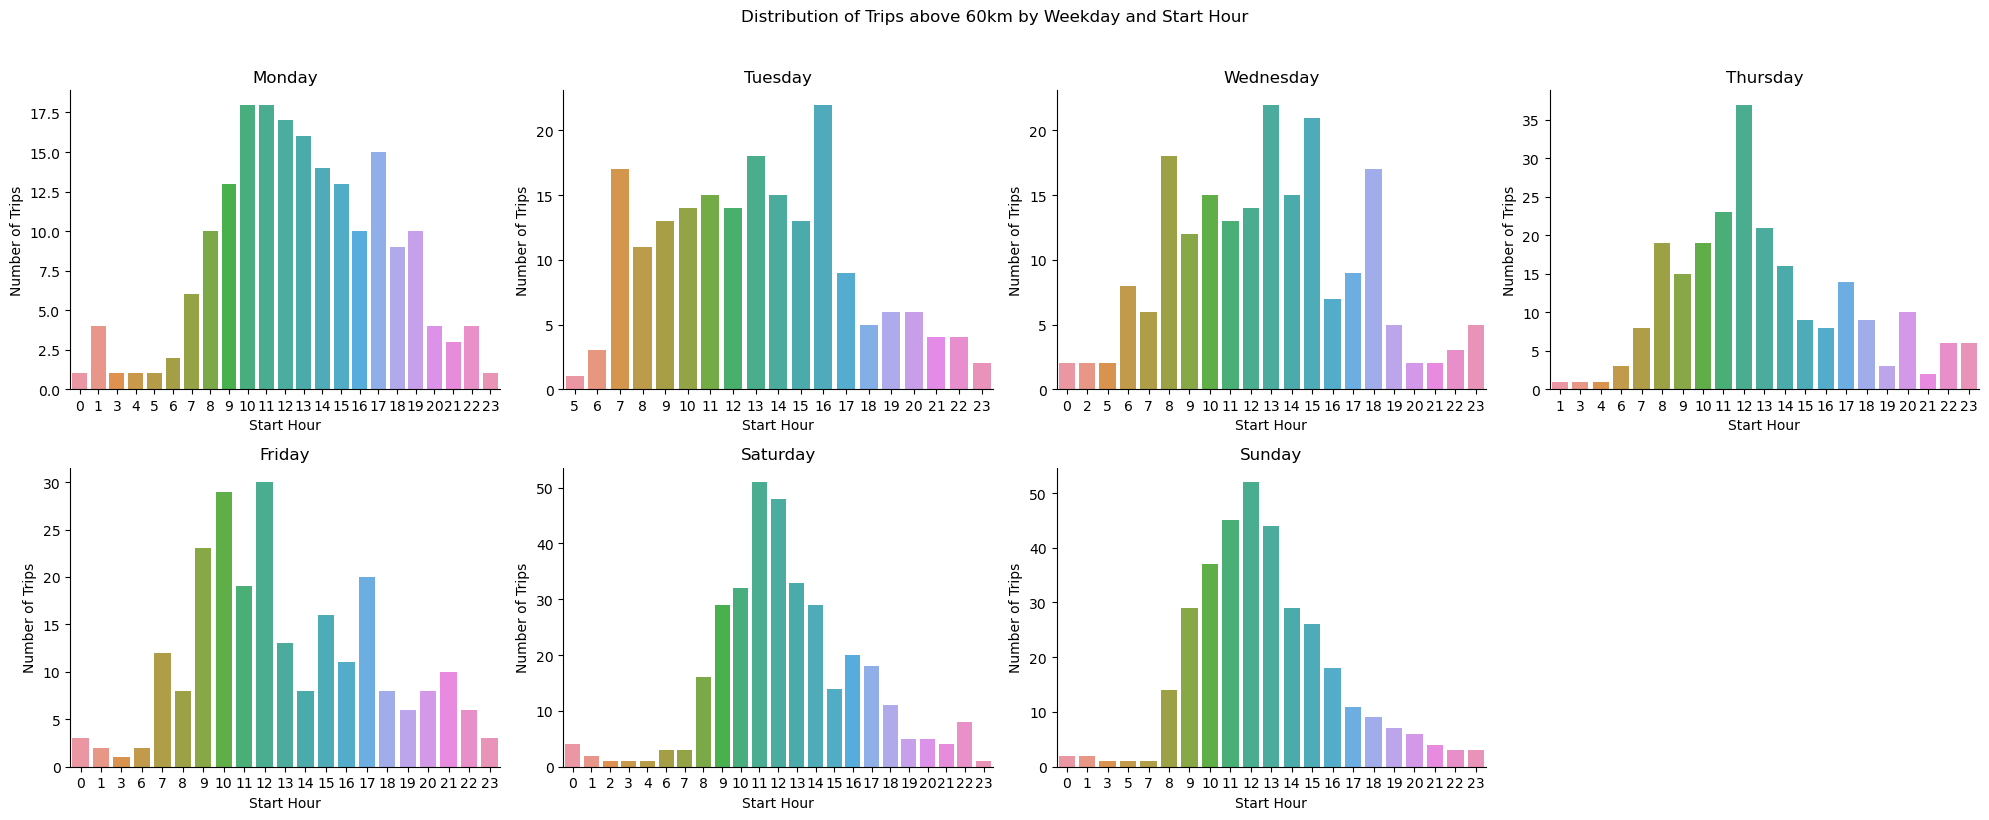

In [29]:
# filter trips between 150km and 200km driven
trips_b_50_100km= sn_clean[sn_clean['KmDriven'] > 60]

# plot distribution of trips between 150km and 200km driven by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=trips_b_50_100km, x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Trips above 60km by Weekday')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

# plot distribution of trips between 150km and 200km driven by weekday and StartHour
# create a plot of 7 subplots for each weekday by StartHour
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.ravel()

for i, day in enumerate(weekdays):
    axs[i].set_title(day)
    sns.countplot(x='StartHour', data=trips_b_50_100km[trips_b_50_100km['Weekday'] == day], ax=axs[i])
    axs[i].set_xlabel('Start Hour')
    axs[i].set_ylabel('Number of Trips')

# remove last 1 subplot
fig.delaxes(axs[-1])
# set title
fig.suptitle('Distribution of Trips above 60km by Weekday and Start Hour', y=1.02)
plt.tight_layout()
sns.despine()
plt.show()

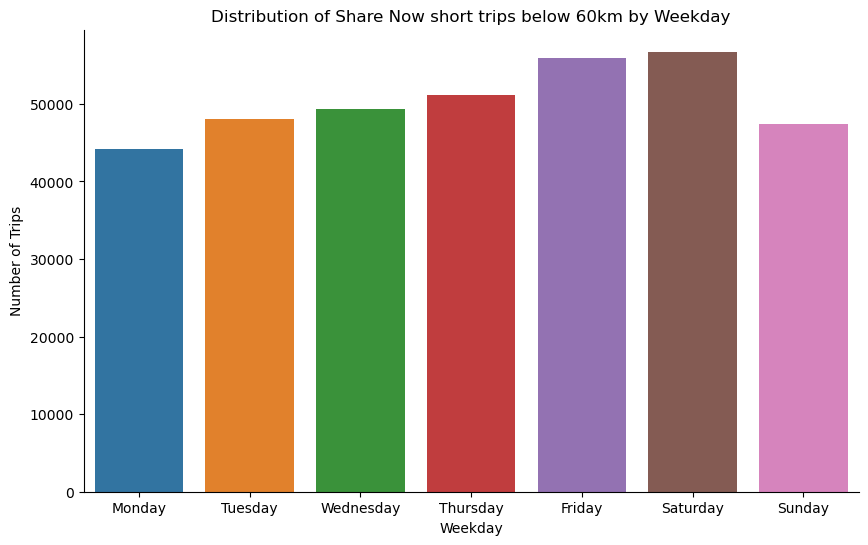

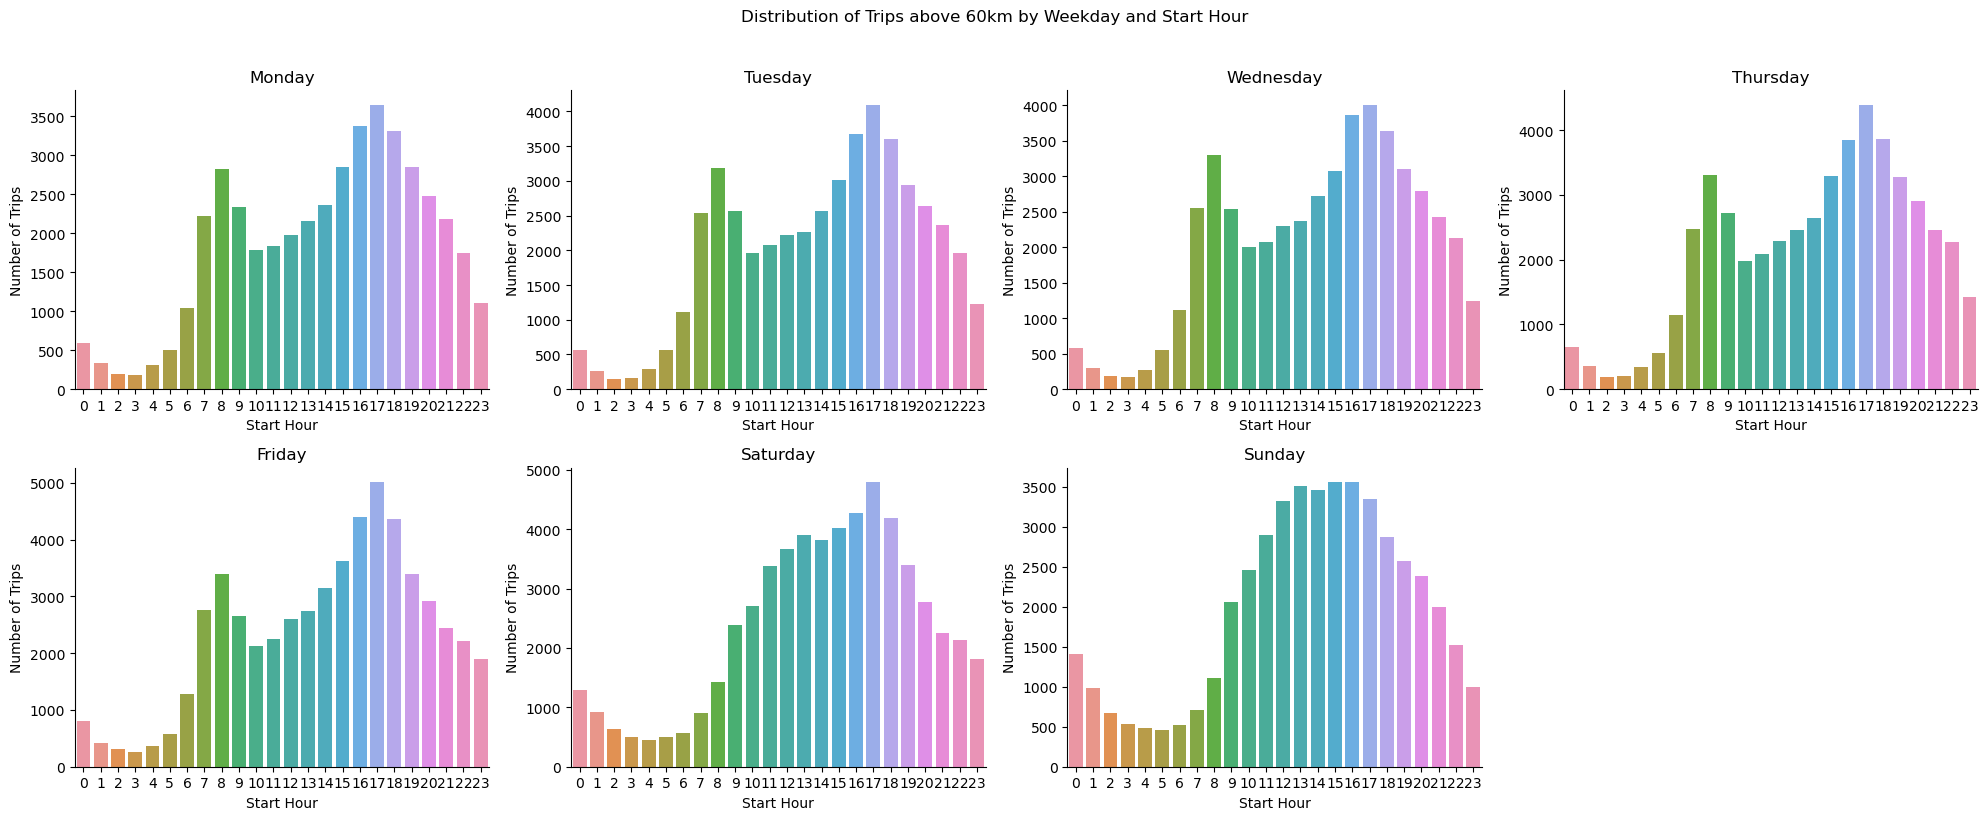

In [30]:
# plot distribution of short trips driven by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=sn_clean[sn_clean["LongTrip"]==0], x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Share Now short trips below 60km by Weekday')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

# plot distribution of trips between 150km and 200km driven by weekday and StartHour
# create a plot of 7 subplots for each weekday by StartHour
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.ravel()

for i, day in enumerate(weekdays):
    axs[i].set_title(day)
    sns.countplot(x='StartHour', data=sn_clean[sn_clean["LongTrip"]==0][sn_clean[sn_clean["LongTrip"]==0]['Weekday'] == day], ax=axs[i])
    axs[i].set_xlabel('Start Hour')
    axs[i].set_ylabel('Number of Trips')

# remove last 1 subplot
fig.delaxes(axs[-1])
# set title
fig.suptitle('Distribution of Trips above 60km by Weekday and Start Hour', y=1.02)
plt.tight_layout()
sns.despine()
plt.show()


## Categorical vs. Numerical Analysis

### Distribution of KmDriven Across Days of the Week

- The median distance driven appears fairly consistent across all days.
- There's a wider range of trip distances on weekends, especially on Saturdays, suggesting more variability or outliers on weekends.
- The whiskers of the box plot (representing the range within which most data falls) are extended on Saturdays, indicating longer trips on that day.

### Distribution of KmDriven Across Hours of the Day

- The median distance driven is fairly consistent throughout the day.
- The early morning hours (from around midnight to 3 AM) have a wider interquartile range, suggesting more variability in the distances of trips during this period.
- The boxplot whiskers for early morning hours extend further, indicating longer trips during these hours.
- From 4 AM to 6 AM, there's a reduction in the distance driven, and then it stays relatively consistent throughout the day.



## Categorical vs. Categorical Analysis

A cross-tabulation between `Weekday` and `StartHour` was conducted to understand car usage patterns:

1. **Weekdays**: Clear peaks are observed around commuting hours (e.g., 8 AM and 5 PM), especially from Monday to Friday.
2. **Weekends**: There's a higher frequency of car usage during the late night to early morning hours, especially on Saturdays, suggesting weekend outings or longer trips that start late at night.
3. **Sunday Evenings**: A decline in car usage on Sunday evenings was observed.

The heatmap visualization provides a clear view of the patterns of car usage throughout the week, aiding in understanding car availability and demand patterns.



## Categorical vs. Categorical Analysis

### Car Usage Frequency by Day and Hour (Heatmap)

The heatmap visualizes car usage frequency by day and hour:
- Darker shades represent higher frequencies, indicating peak car usage times.
- Lighter shades represent lower frequencies.

Observations:
1. **Weekdays**: Clear peaks around commuting hours (e.g., 8 AM and 5 PM) from Monday to Friday.
2. **Weekends**: Higher frequency of car usage during the late night to early morning hours, especially on Saturdays.
3. **Sunday Evenings**: A decline in car usage.

### Bar Plots for Weekday vs. StartHour and Monthly Usage

The bar plots provide a detailed view of the car usage distribution by hour for each day and by month.


<Axes: xlabel='Month', ylabel='count'>

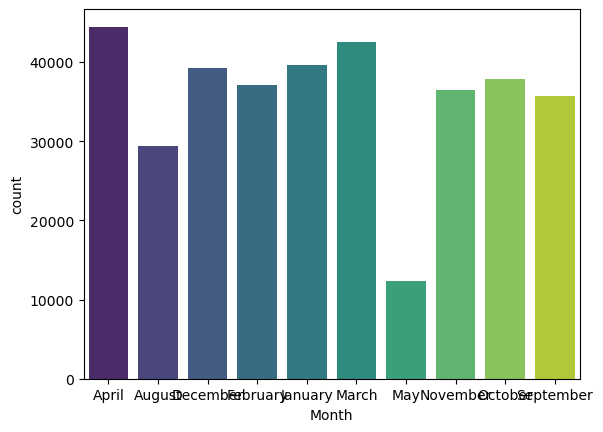

In [31]:
sns.countplot(data=sn_clean, x='Month', palette='viridis')

In [32]:
sn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354566 entries, 0 to 355336
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   BilID                354566 non-null  object         
 1   PersonID             354566 non-null  int64          
 2   LatitudeStart        354566 non-null  float64        
 3   LongitudeStart       354566 non-null  float64        
 4   LatitudeEnd          354566 non-null  float64        
 5   LongitudeEnd         354566 non-null  float64        
 6   ReservationTime      354566 non-null  datetime64[ns] 
 7   StartTime            354566 non-null  datetime64[ns] 
 8   EndTime              354566 non-null  datetime64[ns] 
 9   Age                  354566 non-null  int64          
 10  Gender               354566 non-null  category       
 11  BatteryStart         354566 non-null  int64          
 12  BatteryEnd           354566 non-null  int64          
 13  KmDr

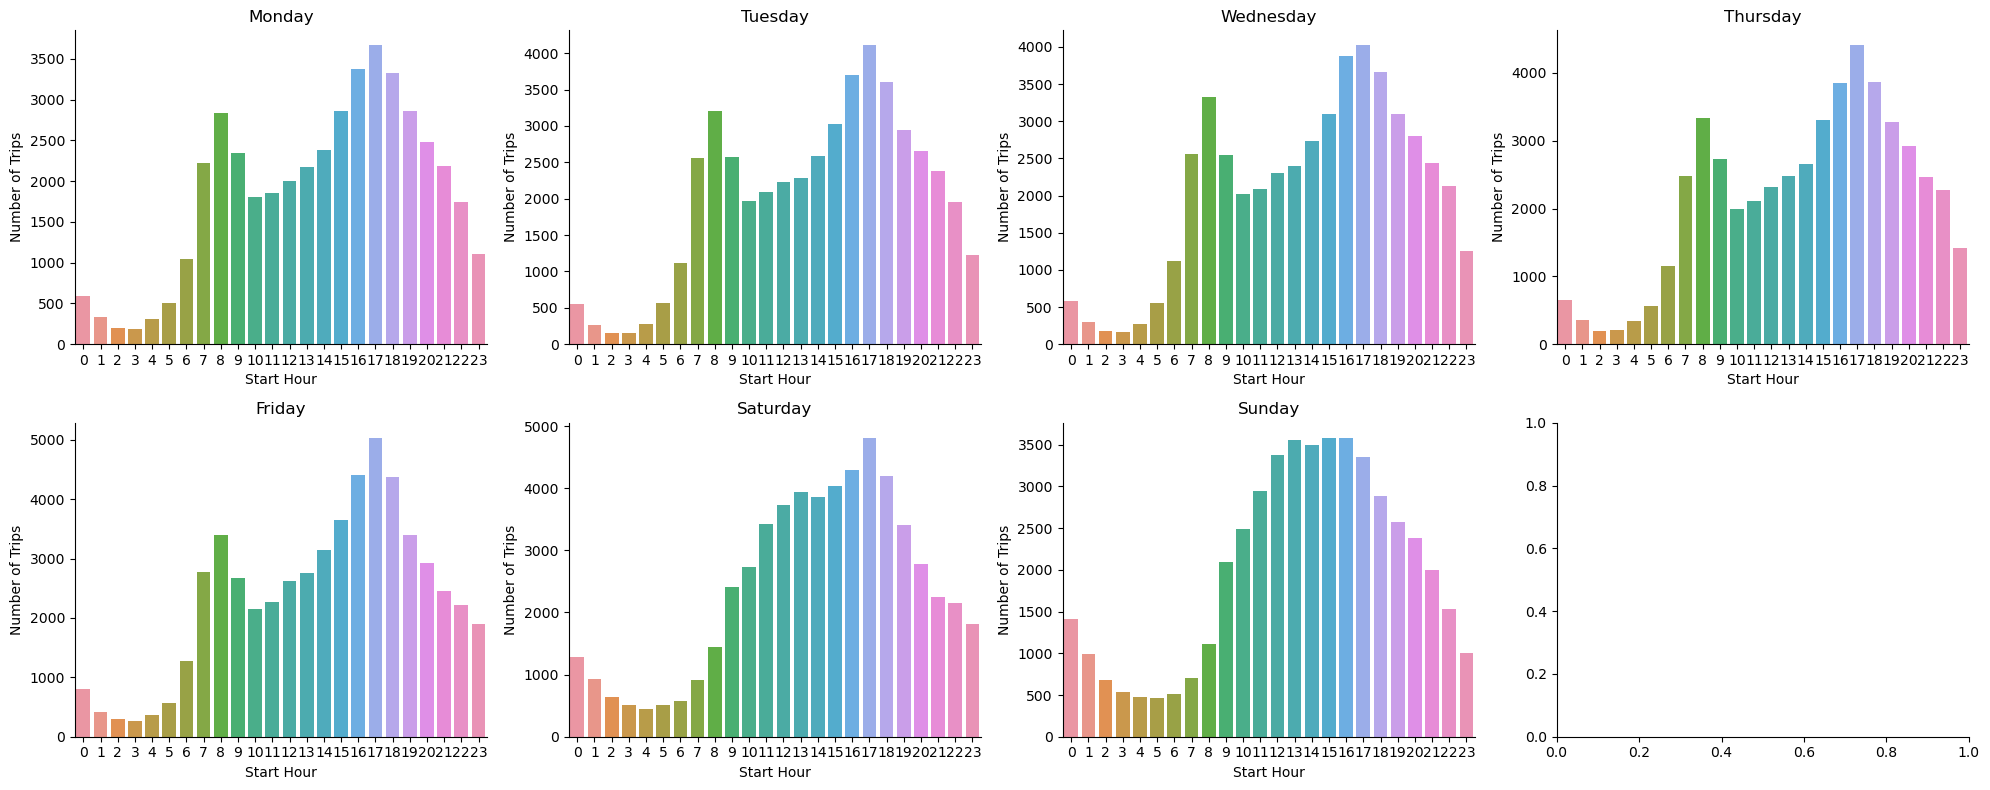

In [33]:
# create a plot of 7 subplots for each weekday by StartHour
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.ravel()

for i, day in enumerate(weekdays):
    axs[i].set_title(day)
    sns.countplot(x='StartHour', data=sn_clean[sn_clean['Weekday'] == day], ax=axs[i])
    axs[i].set_xlabel('Start Hour')
    axs[i].set_ylabel('Number of Trips')

plt.tight_layout()
sns.despine()
plt.show()

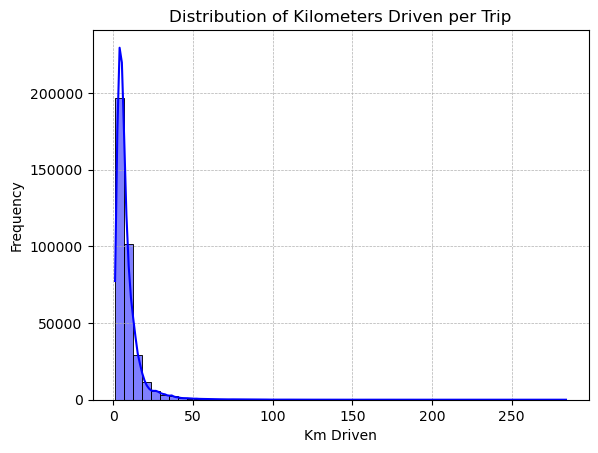

In [34]:

# Histogram for the distribution of KmDriven
sns.histplot(data=sn_clean, x='KmDriven', bins=50, kde=True, color='blue')
plt.title('Distribution of Kilometers Driven per Trip')
plt.xlabel('Km Driven')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


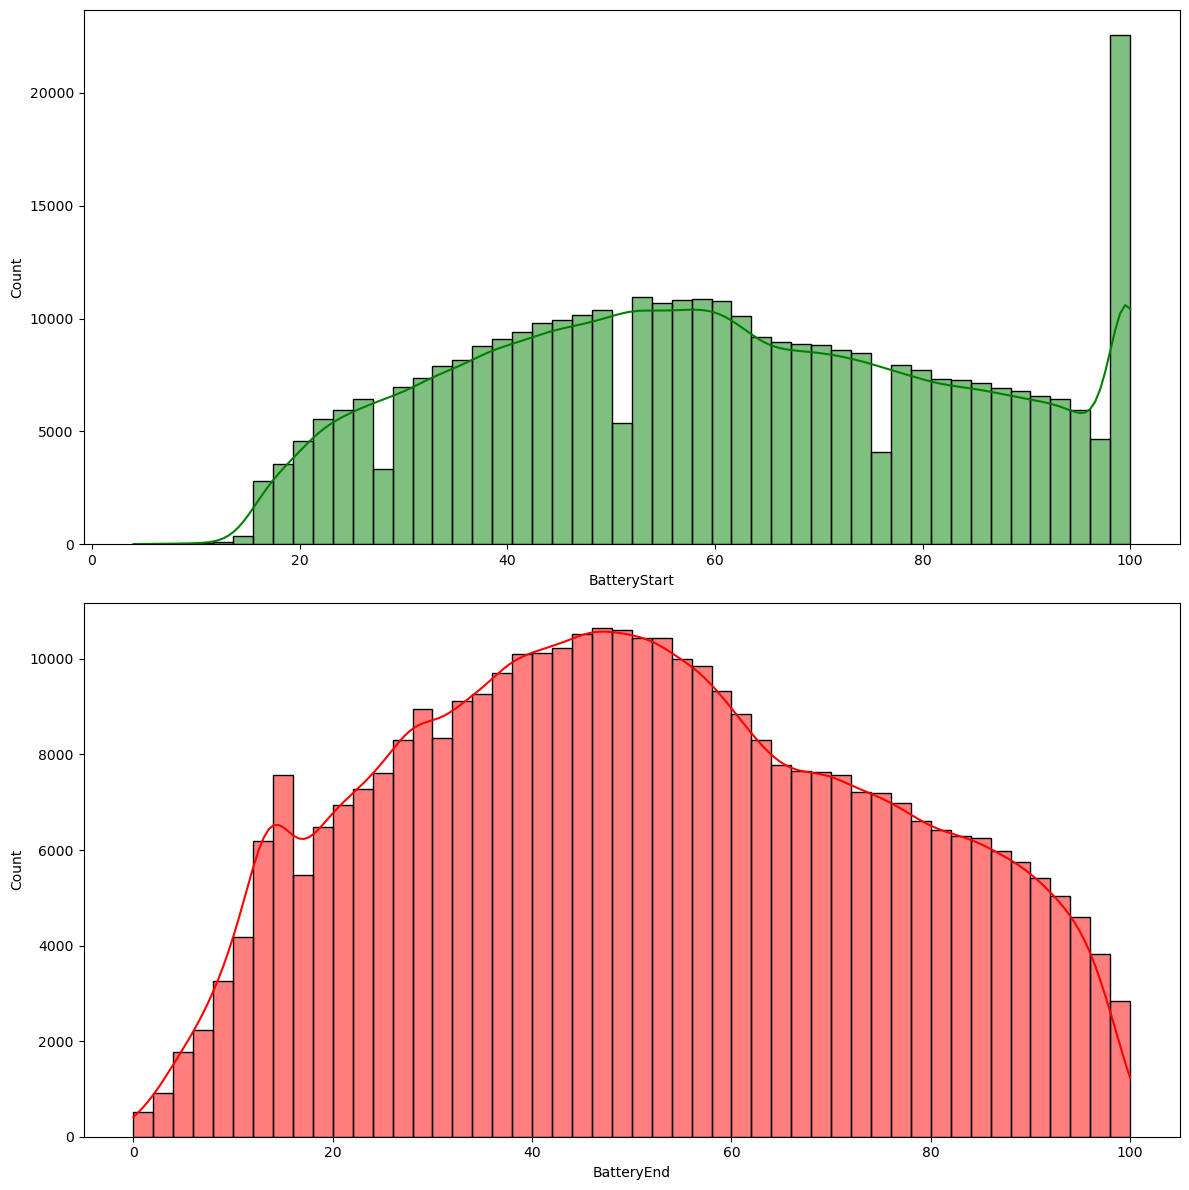

In [35]:

# Histograms for the distribution of BatteryStart and BatteryEnd
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data=sn_clean, x='BatteryStart', bins=50, kde=True, color='green', ax=ax[0])
sns.histplot(data=sn_clean, x='BatteryEnd', bins=50, kde=True, color='red', ax=ax[1])
plt.tight_layout()


In [36]:
sn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354566 entries, 0 to 355336
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   BilID                354566 non-null  object         
 1   PersonID             354566 non-null  int64          
 2   LatitudeStart        354566 non-null  float64        
 3   LongitudeStart       354566 non-null  float64        
 4   LatitudeEnd          354566 non-null  float64        
 5   LongitudeEnd         354566 non-null  float64        
 6   ReservationTime      354566 non-null  datetime64[ns] 
 7   StartTime            354566 non-null  datetime64[ns] 
 8   EndTime              354566 non-null  datetime64[ns] 
 9   Age                  354566 non-null  int64          
 10  Gender               354566 non-null  category       
 11  BatteryStart         354566 non-null  int64          
 12  BatteryEnd           354566 non-null  int64          
 13  KmDr

In [37]:
sn_clean.Month.value_counts()

Month
April        44449
March        42464
January      39618
December     39202
October      37821
February     37151
November     36515
September    35695
August       29373
May          12278
Name: count, dtype: int64

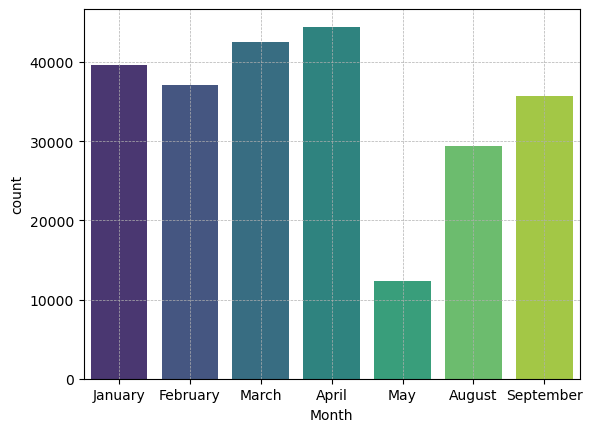

In [38]:

# Bar plot for the frequency of trips across months
sns.countplot(data=sn_clean, x='Month', palette='viridis', order=["January", "February", "March", "April", "May", "August", "September"])

plt.grid(True, which='both', linestyle='--', linewidth=0.5)


In [39]:
# use haversine package to calculate distance between two points
from haversine import haversine as hs, Unit

# create a function to calculate distance between two points
def calculate_distance(row):
    coords_1 = (row['LatitudeStart'], row['LongitudeStart'])
    coords_2 = (row['LatitudeEnd'], row['LongitudeEnd'])
    return hs(coords_1, coords_2, unit=Unit.KILOMETERS)

# apply the function to calculate distance between two points
sn_clean['HaversineDistance'] = sn_clean.apply(calculate_distance, axis=1)

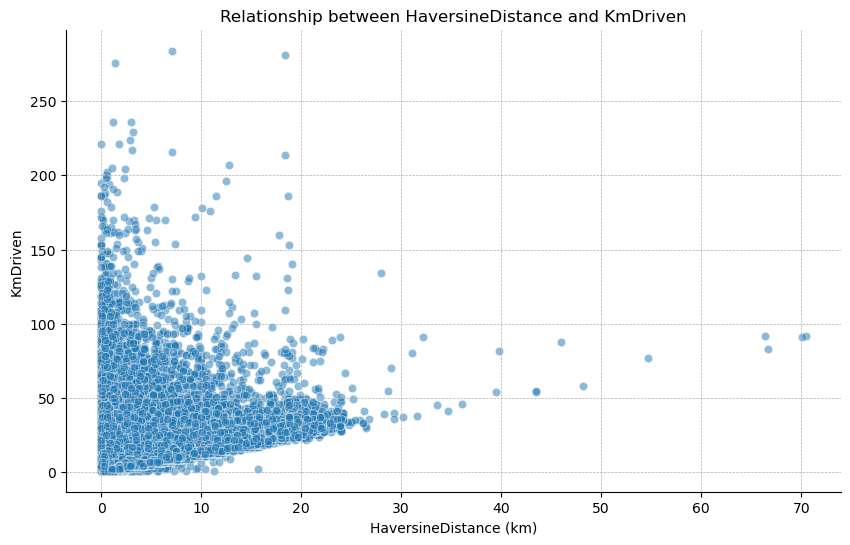

In [40]:
# scatterplot of HaversineDistance vs KmDriven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='HaversineDistance', y='KmDriven', alpha=0.5)
plt.title('Relationship between HaversineDistance and KmDriven')
plt.xlabel('HaversineDistance (km)')
plt.ylabel('KmDriven')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.show()


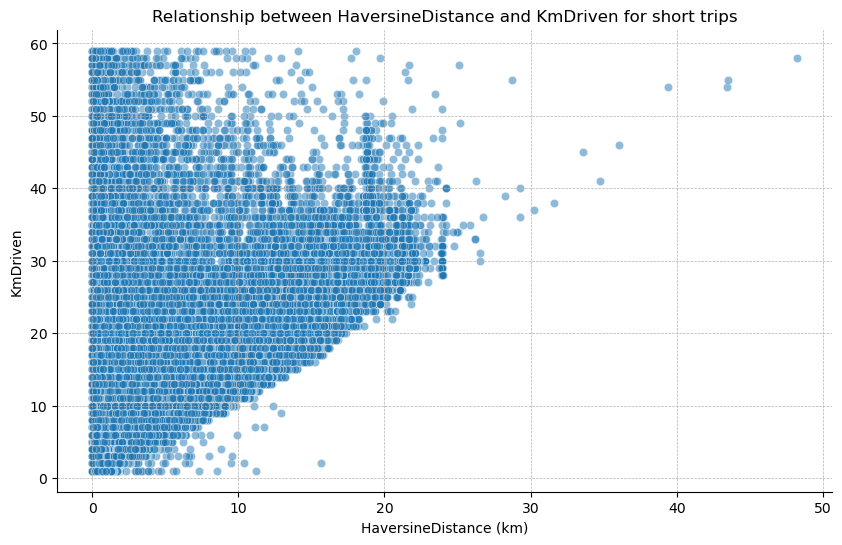

In [41]:
# scatterplot of HaversineDistance vs KmDriven for short trips
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean[sn_clean['KmDriven'] < 60], x='HaversineDistance', y='KmDriven', alpha=0.5)
plt.title('Relationship between HaversineDistance and KmDriven for short trips')
plt.xlabel('HaversineDistance (km)')
plt.ylabel('KmDriven')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.show()


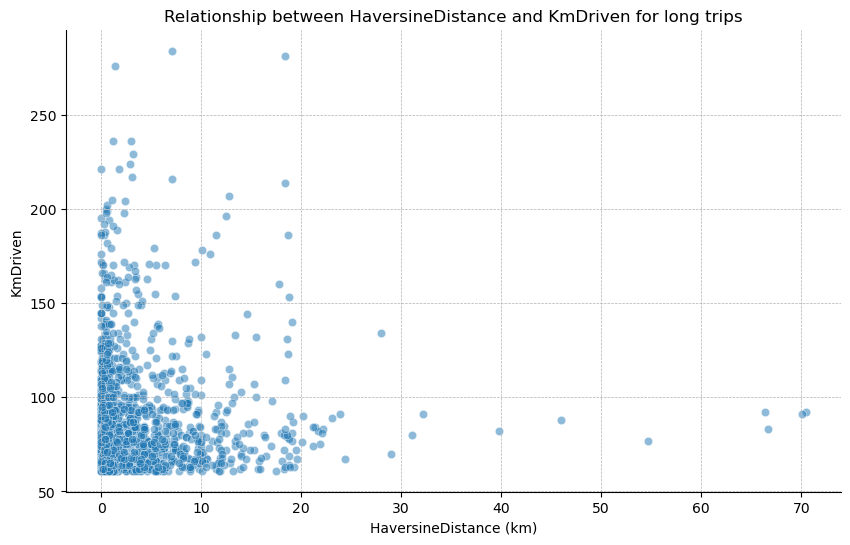

In [42]:
# scatterplot of HaversineDistance vs KmDriven for long trips
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean[sn_clean['KmDriven'] > 60], x='HaversineDistance', y='KmDriven', alpha=0.5)
plt.title('Relationship between HaversineDistance and KmDriven for long trips')
plt.xlabel('HaversineDistance (km)')
plt.ylabel('KmDriven')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.show()


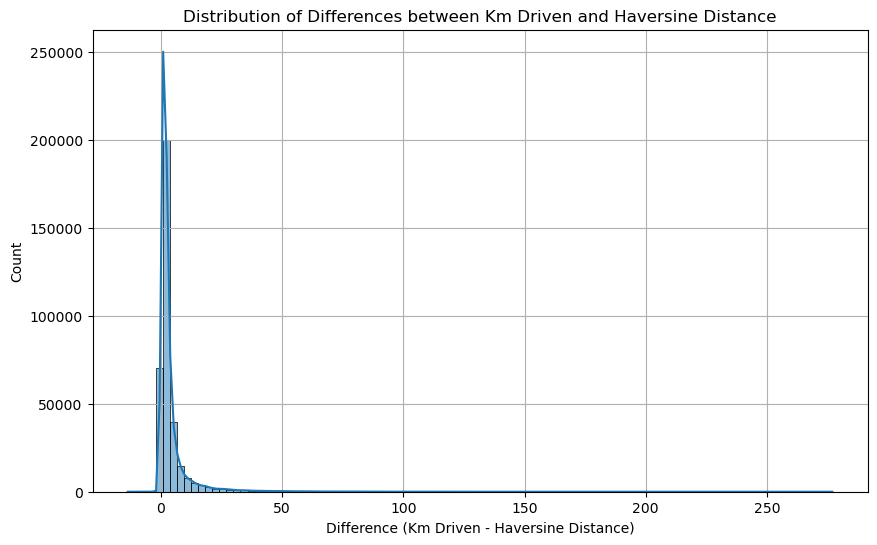

In [43]:
# Calculate the difference between Km Driven and Euclidean Distance
sn_clean['Difference'] = sn_clean['KmDriven'] - sn_clean['HaversineDistance']

# Plotting the histogram of the differences
plt.figure(figsize=(10, 6))
sns.histplot(sn_clean['Difference'], bins=100, kde=True)
plt.title("Distribution of Differences between Km Driven and Haversine Distance")
plt.xlabel("Difference (Km Driven - Haversine Distance)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


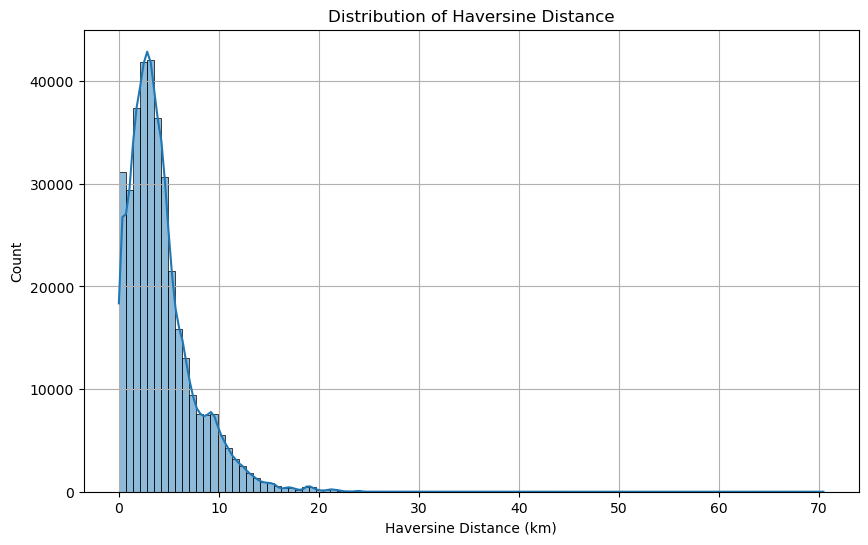

In [44]:
# inspect haversine distance distribution
plt.figure(figsize=(10, 6))
sns.histplot(sn_clean['HaversineDistance'], bins=100, kde=True)
plt.title("Distribution of Haversine Distance")
plt.xlabel("Haversine Distance (km)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [45]:
# count nr of trips with HaversineDistance < 3km
sn_clean[sn_clean['HaversineDistance'] < 3]['HaversineDistance'].count()


151076

In [58]:
from keplergl import KeplerGl
# load an empty map
map_1 = KeplerGl(height=600, width=800)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [47]:
# import gpd
import geopandas as gpd

In [48]:
# import cop_area shapefile from data/processed
cop_area = gpd.read_file('../data/processed/cop_area.shp')

In [54]:
long_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 6 to 355213
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   BilID                1735 non-null   object         
 1   PersonID             1735 non-null   int64          
 2   LatitudeStart        1735 non-null   float64        
 3   LongitudeStart       1735 non-null   float64        
 4   LatitudeEnd          1735 non-null   float64        
 5   LongitudeEnd         1735 non-null   float64        
 6   ReservationTime      1735 non-null   datetime64[ns] 
 7   StartTime            1735 non-null   datetime64[ns] 
 8   EndTime              1735 non-null   datetime64[ns] 
 9   Age                  1735 non-null   int64          
 10  Gender               1735 non-null   category       
 11  BatteryStart         1735 non-null   int64          
 12  BatteryEnd           1735 non-null   int64          
 13  KmDriven             

In [60]:
# create dataset for long trips
long_trips = sn_clean[sn_clean['LongTrip'] ==1]
# drop TripDuration column
long_trips.drop('TripDuration', axis=1, inplace=True)
sn_clean.drop('TripDuration', axis=1, inplace=True)

C:\Users\mihai\AppData\Local\Temp\ipykernel_26112\386877753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_trips.drop('TripDuration', axis=1, inplace=True)


In [65]:
# take sample of 10000 rows from sn_clean withouth replacement
sample = sn_clean[sn_clean["LongTrip"]==0].sample(10000, replace=False)

In [66]:
# add data to the map 
map_1.add_data(data=cop_area, name='zones')
map_1.add_data(data=sample, name='share_now')